# Calculating transition states - part 2

Machine Learning NEB by CatLearn (MLNEB)

NEB images are generated and added dynamically based on the Gaussian Training Process. Each image is a product of a single-point calculation rather than optimisation. Overall efficiency in terms of resources should be increased by an order of magnitude.

If you use CatLearn's ML-NEB module, please cite:

J. A. Garrido Torres, M. H. Hansen, P. C. Jennings, J. R. Boes and T. Bligaard. Phys. Rev. Lett. 122, 156001. https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.122.156001


Start with reading the toy model of Au FCC(111) surface and 2 Cu ad atoms generated in part 1.

In [1]:
from catlearn.optimize.mlneb import MLNEB
from ase.calculators.emt import EMT

# Read input structures
from ase.io import read
slab_initial = read("slab_initial.traj")
slab_final = read("slab_final.traj")

# Desired nuber of images including start and end point
# Can be fraction e.g. 0.25, then the number of imaages is then determined automatically based on MEP length
n = 7 

# Supply your calculator of choice
calculator = EMT()

# Choose interpolation as automatically generated linear/idpp or own suplied
interpolation = "idpp" 

# Setup the Catlearn object for MLNEB
neb_catlearn = MLNEB(start=slab_initial,
                     end=slab_final,
                     ase_calc=calculator,
                     n_images=n,
                     interpolation=interpolation, 
                     restart=True) # When True looks for evaluated_structures.traj

# Run the NEB optimisation. Adjust fmax to desired convergence criteria, usually 0.01 ev/A
neb_catlearn.run(fmax=0.05, trajectory='ML-NEB.traj', full_output=False, steps=75)

# Warning, this calculation can take a long time in serial once past 100 iterations.
# Might not be ideal for trivial systems, e.g. small molecules in the gas phase.



/home/igor/.local/lib/python3.6/site-packages/ase/parallel.py:342: FutureWarning: ase.parallel.rank has been deprecated.  Please use ase.parallel.world.rank instead.
  FutureWarning)
/home/igor/.local/lib/python3.6/site-packages/ase/atoms.py:972: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  np.VisibleDeprecationWarning)


 
       ____      _   _                          
      / ___|__ _| |_| |    ___  __ _ _ __ _ __  
     | |   / _` | __| |   / _ \/ _` | '__| '_ \ 
     | |__| (_| | |_| |__|  __/ (_| | |  | | | |
      \____\__,_|\__|_____\___|\__,_|_|  |_| |_| ML-NEB 0.6.2
      
      
+--------+------+---------------------+---------------------+---------------------+--------------+--------------+----------+
| Method | Step |        Time         | Pred. barrier (-->) | Pred. barrier (<--) | Max. uncert. | Avg. uncert. |   fmax   |
+--------+------+---------------------+---------------------+------------------+--------------+--------------+----------+
| ML-NEB |     0| 2020-09-21 11:46:59 |             0.000000|             0.000000|      0.000000|      0.000000|  0.018158|
+--------+------+---------------------+---------------------+------------------+--------------+--------------+----------+
+--------+------+---------------------+---------------------+---------------------+--------------+---------

/home/igor/.local/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:519: RuntimeWarning: invalid value encountered in true_divide
  J_transposed[i] = df / dx
/home/igor/.local/lib/python3.6/site-packages/ase/utils/__init__.py:530: FutureWarning: NEBTools.get_fit() is deprecated.  Please use ase.utils.forcecurve.fit_images(images).
  warnings.warn(warning)




+--------+------+---------------------+---------------------+---------------------+--------------+--------------+----------+
| Method | Step |        Time         | Pred. barrier (-->) | Pred. barrier (<--) | Max. uncert. | Avg. uncert. |   fmax   |
+--------+------+---------------------+---------------------+------------------+--------------+--------------+----------+
| ML-NEB |     0| 2020-09-21 11:47:05 |             0.000000|             0.000000|      0.000000|      0.000000|  0.018158|
| ML-NEB |     1| 2020-09-21 11:47:05 |             0.000000|             0.000000|      0.000000|      0.000000|  0.737986|
| ML-NEB |     2| 2020-09-21 11:47:05 |             0.143640|             0.004190|      0.096940|      0.054190|  1.800680|
+--------+------+---------------------+---------------------+------------------+--------------+--------------+----------+


Training a Gaussian process...
Number of training points: 4
Gaussian process trained.


+--------+------+---------------------+

In [2]:
# Check the output of MLNEB
from ase.io import read
#view(read("ML-NEB.traj@:"))

In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/igor/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_c

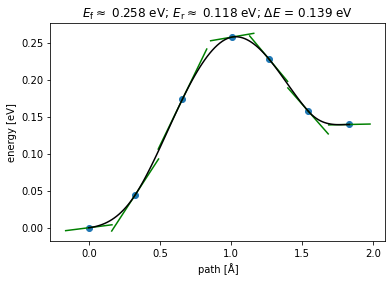

In [3]:
# Now let's analyse the output, if dealing with one calculation it is sufficient to use
# ASE GUI and choose Tools --> NEB to see the plot

import matplotlib.pyplot as plt
from ase.neb import NEBTools
from ase.io import read

nebtools = NEBTools(read("ML-NEB.traj@:"))

# Get the calculated barrier and the energy change of the reaction.
Ef, dE = nebtools.get_barrier()

# Get the actual maximum force at this point in the simulation.
max_force = nebtools.get_fmax()

# Create a figure like that coming from ASE-GUI.
fig = nebtools.plot_band()
fig.savefig('barrier-mlneb.png')